<a href="https://colab.research.google.com/github/GuilhermeAzevedo2001/ControladorPI/blob/main/TrabControle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto controlador PI

Brenno Hissao Serikawa nº USP: 11296697

Guilherme Azevedo nº USP: 11345600


In [ ]:
11345600 + 11296697

22642297

##Bibliotecas utilizadas

In [ ]:
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 398 kB 4.6 MB/s 
  Created wheel for control: filename=control-0.9.2-py2.py3-none-any.whl size=403205 sha256=c1a0129d1b7f096eead0e69287400965f88ce92fe258b32e34c6f701f1f13732
  Stored in directory: /root/.cache/pip/wheels/48/ef/c2/929bb5c59a1328df00a0561d0e68cd7c8537f33f5ce0ce741b
Successfully built control


In [ ]:
import control
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

##Equações

Logo modelo de velocidade é $G_4$, $M_p < 7\%$ e $T_s < 3.0$

---

Como $M_p = e^{\dfrac{-\pi\zeta}{\sqrt{1-\zeta^2}}}$

logo,$\zeta = - \dfrac{\ln (M_p)}{\sqrt{\ln(M_p)^2 + \pi^2}}$

Tomando $M_p = 0.07 \implies \zeta = 0.646082$


---
Como $T_s = \dfrac{4}{\zeta \omega_n} < 3.0$

$\zeta\omega_n>\dfrac{4}{3}$

Com isso, os polos de malha fechada deve possuir a parte real menor que $-\dfrac{4}{3}$

$\omega_n = 2,0639$


$\omega_d = \omega_n \sqrt{1-\zeta^2}$

$\omega_d = 1,5755 rad/s$

logo,

$s_{1,2} = -\dfrac{4}{3}\pm 1,5755j$

---

Text(0, 0.5, 'Imaginario')

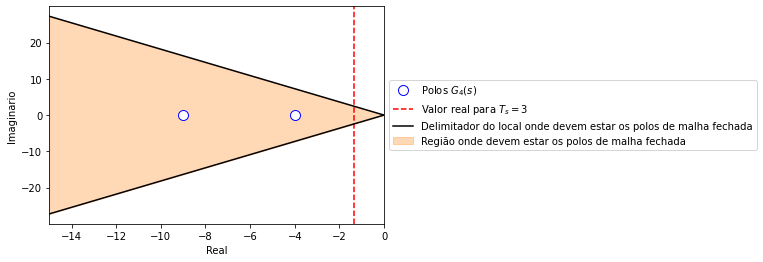

In [ ]:
##REgiao dos polos de malha fechada
plt.plot([-4, -9], [0,0], marker="o", markerfacecolor='white', linewidth = 0, ms = 10, mec = 'b',  label = 'Polos $G_4(s)$')
plt.axvline(x = -4/3, color = 'r', linestyle='dashed', label = 'Valor real para $T_s = 3$')
plt.plot(range(-15,1),[-1.8162*i for i in range(-15,1)],color="black", label = 'Delimitador do local onde devem estar os polos de malha fechada')
plt.plot(range(-15,1), [1.8162*i for i in range(-15,1)],color="black")
plt.xlim((-15,0))
plt.fill_between(range(-15,1), [1.8162*i for i in range(-15,1)], [-1.8162*i for i in range(-15,1)], color='C1', alpha=0.3, label = 'Região onde devem estar os polos de malha fechada')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Real')
plt.ylabel('Imaginario')


#Declaração das funções de transferência

Considere que as funções de transferência a seguir representam, de forma simplificada,
modelos utilizados para controle de velocidade longitudinal em veículos terrestres.

In [ ]:
G4 = control.TransferFunction([1],[1,13,36])

In [ ]:
T, yout = control.step_response(G4/(1+G4))

(0.0, 1.0)

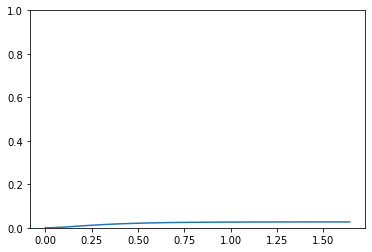

In [ ]:
plt.plot(T, yout)
plt.ylim(0,1)

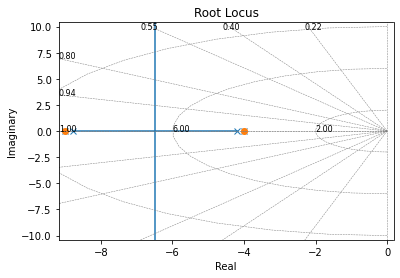

In [ ]:
Polos, ganho = control.rlocus(G4/(1+G4))

Resposta indesejada com muito erro

Sinal de controle com zero proximo ao polo a esquerda

In [ ]:
Cs = control.TransferFunction([1,11],[1,0])

In [ ]:
##Planta utilizada
G4

TransferFunction(array([1]), array([ 1, 13, 36]))

In [ ]:
#Controlador sem ganho definido
Cs

TransferFunction(array([ 1, 11]), array([1, 0]))

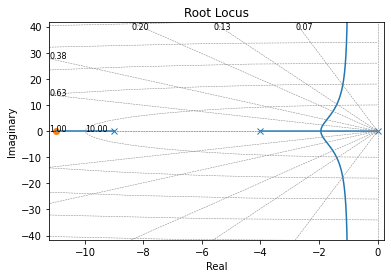

In [ ]:
Polos, ganho = control.rlocus(G4 * Cs)

In [ ]:
X=np.zeros(100)
y=np.zeros(100)
for i in range(0, len(Polos)):
    real = Polos[i][1].real
    imag = Polos[i][1].imag
    zeta = np.abs(real/((imag**2+real**2)**(1/2)))
    if(real < -4/3 and zeta > 0.6460):
        X[i] = real
        y[i] = imag
        print(ganho[i])

0.0
0.7785493003739785
1.557098600747957
2.3356479011219355
2.53028522621543
2.724922551308925
2.9195598764024195
3.114197201495914
3.2286195830200994
3.343041964544285
3.4574643460684706
3.571886727592656
4.029576253689398
4.48726577978614
4.944955305882882
5.402644831979623
5.860334358076365
6.318023884173107
6.775713410269849


In [ ]:
#Ganho usado 6.775713410269849
T, yout = control.step_response(6.775* G4*Cs/(1+ 6.775 * G4 * Cs))

(0.0, 1.2)

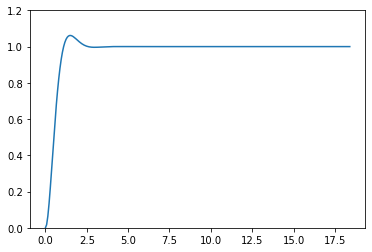

In [ ]:
plt.plot(T, yout)
plt.ylim(0,1.2)

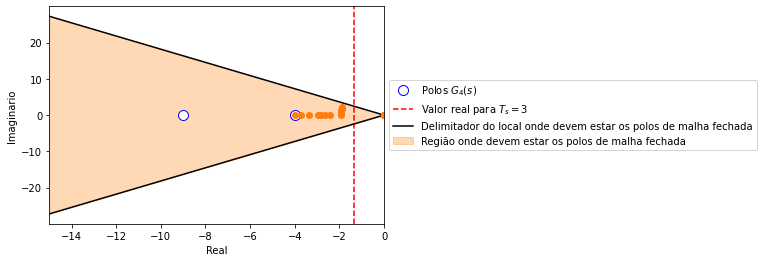

In [ ]:
plt.plot([-4, -9], [0,0], marker="o", markerfacecolor='white', linewidth = 0, ms = 10, mec = 'b',  label = 'Polos $G_4(s)$')
plt.axvline(x = -4/3, color = 'r', linestyle='dashed', label = 'Valor real para $T_s = 3$')
plt.plot(range(-15,1),[-1.8162*i for i in range(-15,1)],color="black", label = 'Delimitador do local onde devem estar os polos de malha fechada')
plt.plot(range(-15,1), [1.8162*i for i in range(-15,1)],color="black")
plt.xlim((-15,0))
plt.fill_between(range(-15,1), [1.8162*i for i in range(-15,1)], [-1.8162*i for i in range(-15,1)], color='C1', alpha=0.3, label = 'Região onde devem estar os polos de malha fechada')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Real')
plt.ylabel('Imaginario')
plt.plot(X, y,  linewidth = 0, marker="o")

Text(0, 0.5, 'Imaginario')

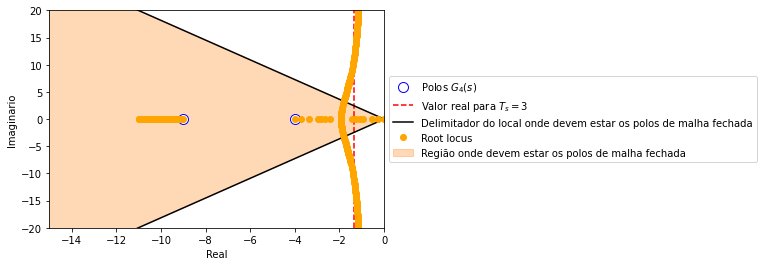

In [ ]:
plt.plot([-4, -9], [0,0], marker="o", markerfacecolor='white', linewidth = 0, ms = 10, mec = 'b',  label = 'Polos $G_4(s)$')
plt.axvline(x = -4/3, color = 'r', linestyle='dashed', label = 'Valor real para $T_s = 3$')
plt.plot(range(-15,1),[-1.8162*i for i in range(-15,1)],color="black", label = 'Delimitador do local onde devem estar os polos de malha fechada')
plt.plot(range(-15,1), [1.8162*i for i in range(-15,1)],color="black")
plt.xlim((-15,0))
plt.ylim((-20,20))
plt.fill_between(range(-15,1), [1.8162*i for i in range(-15,1)], [-1.8162*i for i in range(-15,1)], color='C1', alpha=0.3, label = 'Região onde devem estar os polos de malha fechada')
plt.plot(Polos[:,0].real, Polos[:,0].imag,  linewidth = 0, marker="o", color='orange',  label = 'Root locus')
plt.plot(Polos[:,1].real, Polos[:,1].imag,  linewidth = 0, marker="o", color='orange')
plt.plot(Polos[:,2].real, Polos[:,2].imag,  linewidth = 0, marker="o", color='orange')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Real')
plt.ylabel('Imaginario')

In [ ]:
##Função de transferencia em malha fechada
T = 6.775* G4*Cs/(1+6.775* G4 * Cs)
T

TransferFunction(array([   6.775,  162.6  , 1212.725, 2682.9  ,    0.   ]), array([1.000000e+00, 2.600000e+01, 2.477750e+02, 1.098600e+03,
       2.508725e+03, 2.682900e+03, 0.000000e+00]))

In [ ]:
    control.zeros(T)

array([-11.+0.j,  -9.+0.j,  -4.+0.j,   0.+0.j])

Text(0, 0.5, 'Imaginario')

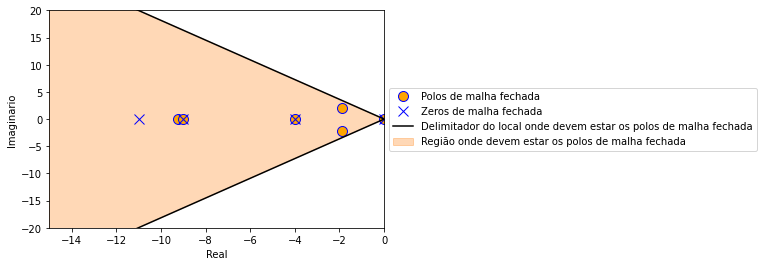

In [ ]:
plt.plot(control.pole(T).real, control.pole(T).imag,   linewidth = 0, marker="o", color='orange', ms = 10, mec = 'b', label = 'Polos de malha fechada')
plt.plot(control.zeros(T).real, control.zeros(T).imag,   linewidth = 0, marker="x", color='orange', ms = 10, mec = 'b', label = 'Zeros de malha fechada')
plt.plot(range(-15,1),[-1.8162*i for i in range(-15,1)],color="black", label = 'Delimitador do local onde devem estar os polos de malha fechada')
plt.plot(range(-15,1), [1.8162*i for i in range(-15,1)],color="black")
plt.xlim((-15,0))
plt.ylim((-20,20))
plt.fill_between(range(-15,1), [1.8162*i for i in range(-15,1)], [-1.8162*i for i in range(-15,1)], color='C1', alpha=0.3, label = 'Região onde devem estar os polos de malha fechada')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Real')
plt.ylabel('Imaginario')

In [ ]:
TF =  6.775* G4*Cs/(1+  6.775 * G4 * Cs)

In [ ]:
Ts = - 4 / control.pole(TF)[4].real

In [ ]:
Ts

2.1305898087090163

In [ ]:
T, yout = control.step_response( 6.775* G4*Cs/(1+  6.775* G4 * Cs))

In [ ]:
r= control.pole(TF)[4].real
i = control.pole(TF)[4].imag
zeta = r / ((r**2 +i**2)**(1/2))
mp = np.e**(np.pi*zeta/((1-zeta**2)**(1/2)))

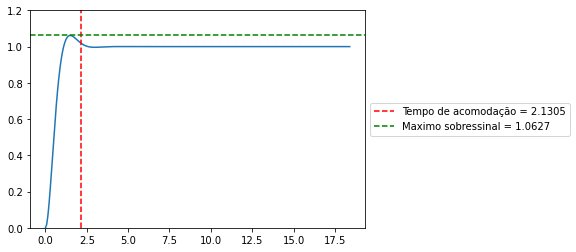

In [ ]:
plt.plot(T, yout)
plt.ylim(0,1.2)
plt.axvline(x = Ts, color = 'r', linestyle='dashed', label = 'Tempo de acomodação = 2.1305')
plt.axhline(y = mp+1 ,color = 'g', linestyle='dashed', label = 'Maximo sobressinal = 1.0627')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
T, yout = control.step_response(1/(1+6.775*G4*Cs))

(-0.5, 1.2)

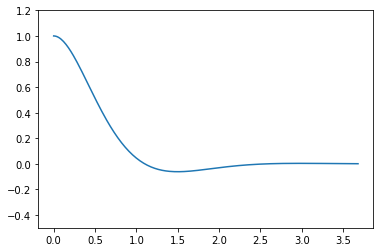

In [ ]:
##Erro do sistema em função do tempo
plt.plot(T, yout)
plt.ylim(-0.5,1.2)

In [ ]:
##entrada na planta
T, yout = control.step_response(6.775*Cs/(1+6.775*G4*Cs))

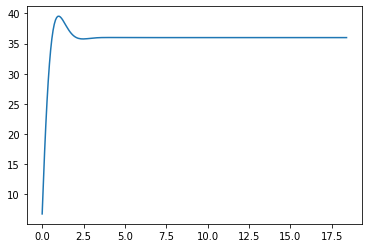

In [ ]:
##Sinal de entrada da planta para degrau unitario
plt.plot(T, yout)

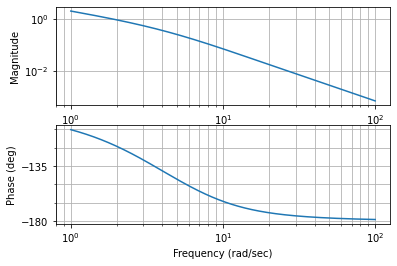

In [ ]:
##REsposta em frequencia de Ls = GC
mag, phase, omega = control.bode(6.775*G4*Cs)